<a href="https://colab.research.google.com/github/karanchhillar/Aritify/blob/master/Skin%20Disease%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print("Hello")

Hello


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! unzip '/content/drive/MyDrive/SIH/data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: data/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-105.jpg  
  inflating: data/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-106.jpg  
  inflating: data/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-107.jpg  
  inflating: data/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-108.jpg  
  inflating: data/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-109.jpg  
  inflating: data/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-110.jpg  
  inflating: data/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-111.jpg  
  inflating: data/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-112.jpg  
  inflating: data/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-113.jpg  
  inflating: data/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-114.jpg  

In [5]:
! unzip '/content/drive/MyDrive/SIH/skindataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: skindataset/skin/train/Normal/10.jpg  
  inflating: skindataset/skin/train/Normal/10_Low_back_pain_is_more_common_in_young_people_than_in_older_adults.jpg  
  inflating: skindataset/skin/train/Normal/100_jpg.rf.ae477000a805d29ac607f1d49b70ac31.jpg  
  inflating: skindataset/skin/train/Normal/101_jpg.rf.a66ba4073dcb6cb3f8579b56be0b48d6.jpg  
  inflating: skindataset/skin/train/Normal/102_jpg.rf.8a6e6d19017dbca6450bcd6cd27ec91b.jpg  
  inflating: skindataset/skin/train/Normal/103_jpg.rf.c238ca88f167fc2690efbf8d731b75c3.jpg  
  inflating: skindataset/skin/train/Normal/104_jpg.rf.cfcee7099c3a287e4db78ed28dae4576.jpg  
  inflating: skindataset/skin/train/Normal/105_jpg.rf.4f0f6052966f8b86ff67b4b1ed982b97.jpg  
  inflating: skindataset/skin/train/Normal/106_jpg.rf.cdb6f2356826fa52fbba523e74bff430.jpg  
  inflating: skindataset/skin/train/Normal/107_jpg.rf.2dc74d5e8cd27b8657ccb70686c9aba6.jpg  
  inflating: skindataset/skin/train

In [6]:
# cp -r '/content/data' '/content/drive/MyDrive/SIH/'

In [7]:
# cp -r '/content/skindataset' '/content/drive/MyDrive/SIH/'

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix,
                             accuracy_score)
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten,
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, accuracy_score)
# Base Libraries
from tensorflow.keras.applications import  VGG19,EfficientNetB0,VGG16,InceptionV3,ResNet50,EfficientNetB3
from tensorflow.keras.models import Model
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.pipeline import Pipeline
# Feature Selection


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [9]:
train2=os.listdir("/content/data/train")


In [10]:
train2


['Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Herpes HPV and other STDs Photos',
 'Systemic Disease',
 'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Warts Molluscum and other Viral Infections',
 'Seborrheic Keratoses and other Benign Tumors',
 'Urticaria Hives',
 'Vascular Tumors',
 'Acne and Rosacea Photos',
 'Bullous Disease Photos',
 'Nail Fungus and other Nail Disease',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Atopic Dermatitis Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Vasculitis Photos',
 'Cellulitis Impetigo and other Bacterial Infections']

In [11]:
cat=['Acne and Rosacea Photos','Normal','vitiligo',
    'Tinea Ringworm Candidiasis and other Fungal Infections',
    'Melanoma Skin Cancer Nevi and Moles','Eczema Photos']

cat2=['Melanoma Skin Cancer Nevi and Moles']

In [12]:
def data_dictionary():
    path_train="/content/skindataset/skin/train/"
    # path_train="C:\Users\chhil\OneDrive\Desktop\sih\skindataset\skin\train"
    path_test="/content/data/train/"
    list_train=cat
    #os.listdir(path_train)
    list_train1=cat2
    train_dictionary={"image_path":[],"target":[]}
    test_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j
            if img_path_train!="/content/skindataset/skin/train/Normal/34.avif":
                train_dictionary["image_path"].append(img_path_train)
                train_dictionary['target'].append(k)
        k+=1
    for i in list_train1:
        path_disease_test=path_test+i
        image_list_test=os.listdir(path_disease_test)
        for j in image_list_test:
            img_path_train=path_disease_test+"/"+j
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(4)
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [13]:
train = data_dictionary()


In [14]:
train = train.drop(train.tail(7).index)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7323 entries, 0 to 7322
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  7323 non-null   object
 1   target      7323 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 114.5+ KB


In [15]:
import cv2
images=[]
label=[]

for img_path in train["image_path"]:
    try:
        if img_path != "/content/skindataset/skin/train/Normal/34.avif":
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (180, 180))
                images.append(img)
            else:
                print(f"Unable to read image: {img_path}")
    except Exception as e:
        print(f"Error processing image {img_path}: {str(e)}")

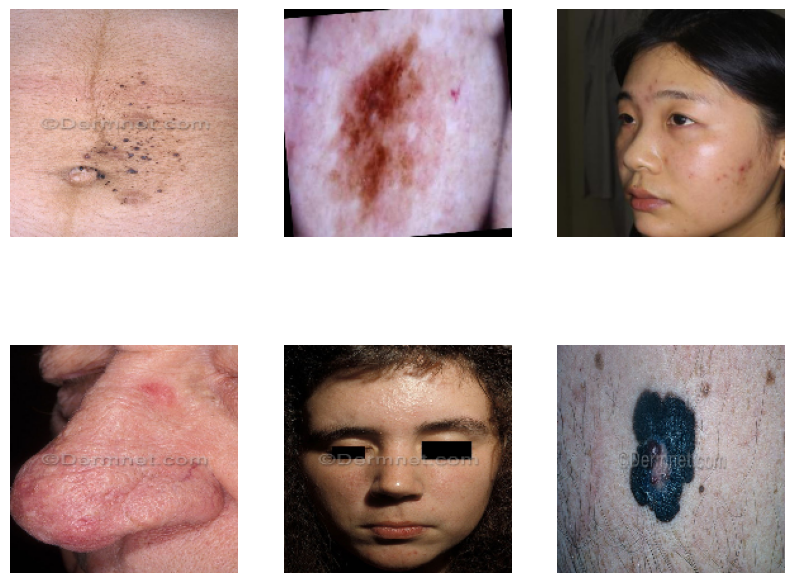

In [16]:
# Create a list of example inputs to our Gradio demo
example_list = [image for image in random.sample(images, k=6)]

# Plot the images in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for ax, img_array in zip(axes.ravel(), example_list):
    ax.imshow(img_array)
    ax.axis('off')

plt.show()

In [17]:
label=train['target']

In [18]:
len(label)


7323

In [19]:
len(images)

7323

In [20]:
import numpy as np
import pandas as pd
data=np.array(images)

In [21]:
label=np.array(label)

In [22]:
data.shape


(7323, 180, 180, 3)

In [23]:
label.shape

(7323,)

In [24]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (180, 180, 3))


80134624/80134624 [==============================] - 1s 0us/step


In [25]:
for layer in vgg_model.layers :
    layer.trainable = False

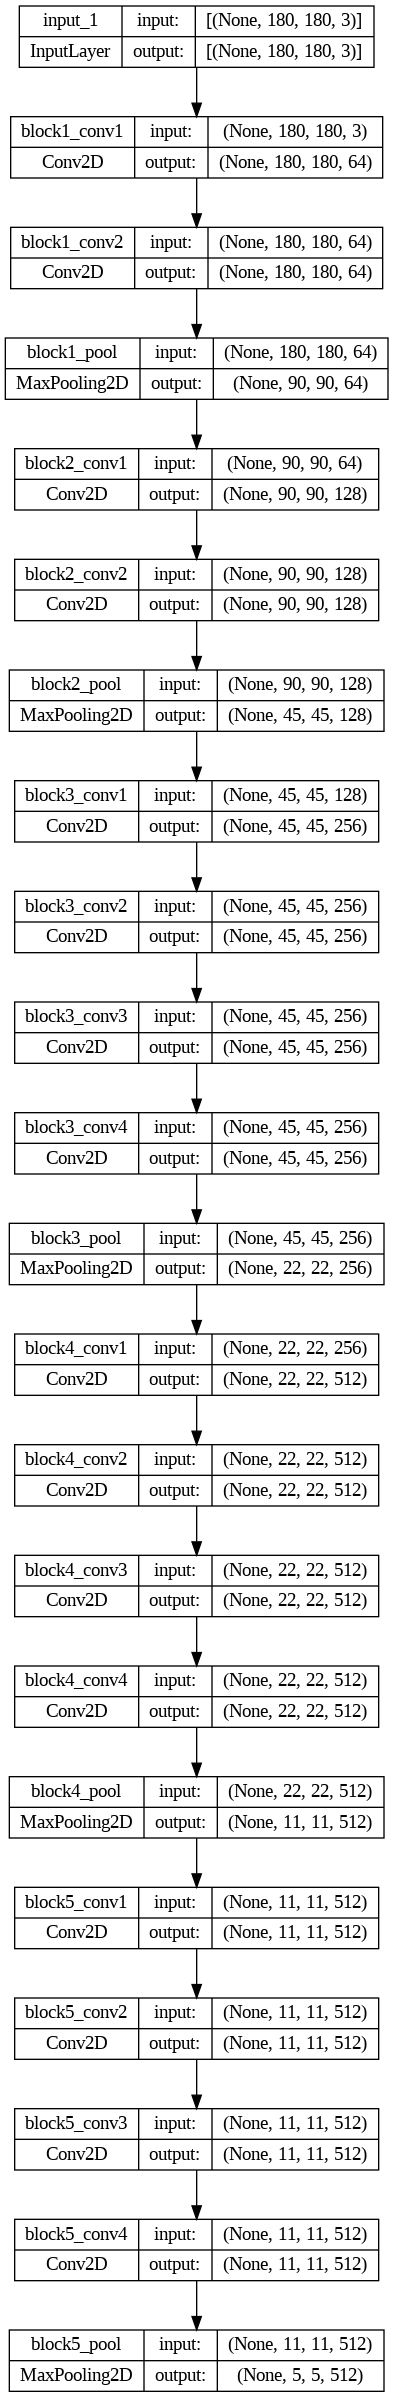

In [26]:
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
plot_model(vgg_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense

In [28]:
model=Sequential([

                    Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(6,activation='softmax'),

])

In [29]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [30]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)

In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
kf = KFold(n_splits = 3)

In [33]:
import keras
acc=[]
num_classes = 6
label = keras.utils.to_categorical(label, num_classes)

In [34]:
label.shape


(7323, 6)

In [35]:
len(data)


7323

In [36]:
len(label)


7323

In [37]:
for i in range(3):
    x_train,x_test, y_train, y_test=train_test_split(data, label, test_size=0.2,random_state = np.random.randint(1,1000, 1)[0])
    print(x_train.shape)
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    print(features_train.shape)
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    print(num_train)
    print(num_test)
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    print(x_train.shape)
    print(x_train.shape)
    #x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0])
#     history=model.fit(x_train,y_train,epochs=15,batch_size=32,verbose=1)
#     model.evaluate(x_test,y_test)

(5858, 180, 180, 3)
46/46 [==============================] - 7s 157ms/step
(5858, 5, 5, 512)
5858
1465
(5858, 12800)
(5858, 12800)
(5858, 180, 180, 3)
46/46 [==============================] - 5s 102ms/step
(5858, 5, 5, 512)
5858
1465
(5858, 12800)
(5858, 12800)
(5858, 180, 180, 3)
46/46 [==============================] - 5s 105ms/step
(5858, 5, 5, 512)
5858
1465
(5858, 12800)
(5858, 12800)


In [38]:
history = model.fit(x_train, y_train, epochs=25)

Epoch 1/25
184/184 [==============================] - 3s 4ms/step - loss: 1.8159 - accuracy: 0.7043
Epoch 2/25
184/184 [==============================] - 1s 4ms/step - loss: 0.4843 - accuracy: 0.8568
Epoch 3/25
184/184 [==============================] - 1s 4ms/step - loss: 0.2479 - accuracy: 0.9148
Epoch 4/25
184/184 [==============================] - 1s 4ms/step - loss: 0.2001 - accuracy: 0.9452
Epoch 5/25
184/184 [==============================] - 1s 5ms/step - loss: 0.1943 - accuracy: 0.9445
Epoch 6/25
184/184 [==============================] - 1s 5ms/step - loss: 0.1415 - accuracy: 0.9619
Epoch 7/25
184/184 [==============================] - 1s 5ms/step - loss: 0.2654 - accuracy: 0.9459
Epoch 8/25
184/184 [==============================] - 1s 5ms/step - loss: 0.2015 - accuracy: 0.9609
Epoch 9/25
184/184 [==============================] - 1s 4ms/step - loss: 0.1163 - accuracy: 0.9710
Epoch 10/25
184/184 [==============================] - 1s 4ms/step - loss: 0.0816 - accuracy: 0.9817

In [39]:
model.save('skin_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix

In [41]:
y_pred=model.predict(x_test)

46/46 [==============================] - 0s 2ms/step


In [42]:
y_pred2=np.argmax(y_pred, axis=1)
y_pred2

array([5, 4, 2, ..., 3, 3, 2])

In [43]:
y_test=np.argmax(y_test, axis=1)

In [44]:
y_test


array([3, 4, 2, ..., 3, 3, 2])

In [45]:
confusion_matrix_result=confusion_matrix(y_test,y_pred2)


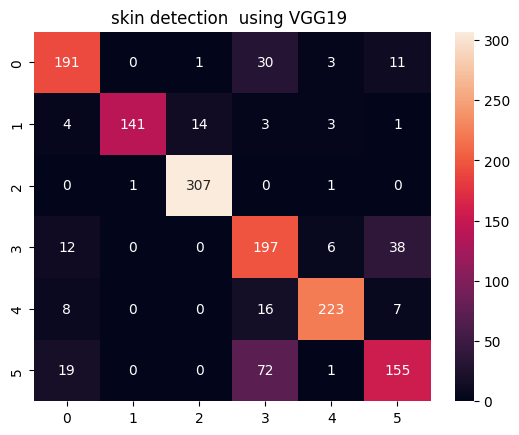

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
plt.title("skin detection  using VGG19 ")

ax= plt.subplot()
sns.heatmap(confusion_matrix_result, annot=True, fmt='g', ax=ax);
pl.show()

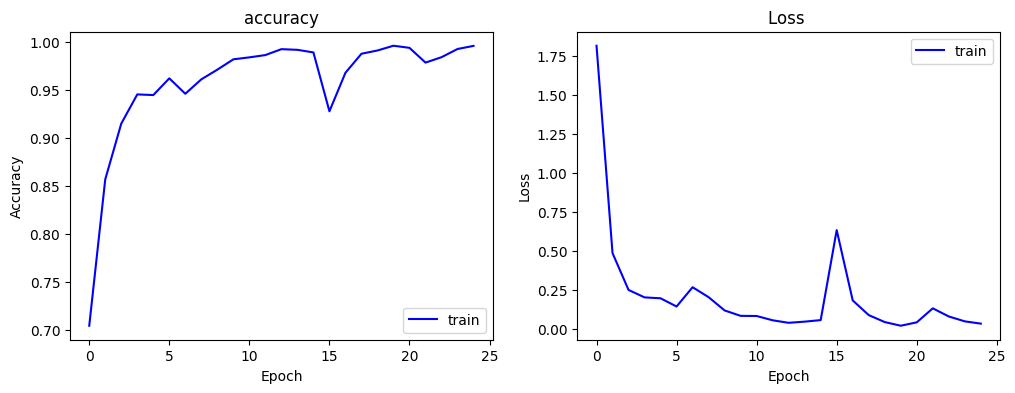

In [47]:
train_accuracy = history.history['accuracy']
#val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))
# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')

plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')

plt.title('Loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')

In [48]:
import os
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D,MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, save_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing import image
import pandas as pd
import tensorflow as tf
import keras
import pickle

In [49]:

confusion_matrix=classification_report(y_test,y_pred2)

In [50]:
print(confusion_matrix)


              precision    recall  f1-score   support

           0       0.82      0.81      0.81       236
           1       0.99      0.85      0.92       166
           2       0.95      0.99      0.97       309
           3       0.62      0.78      0.69       253
           4       0.94      0.88      0.91       254
           5       0.73      0.63      0.68       247

    accuracy                           0.83      1465
   macro avg       0.84      0.82      0.83      1465
weighted avg       0.84      0.83      0.83      1465



In [51]:
import tensorflow as tf
import numpy as np
import cv2

import tensorflow as tf
import numpy as np
import cv2

def predict_skin_disease(image_path):
    # Load saved model
    model = tf.keras.models.load_model('skin_model.h5')

    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    img=vgg_model.predict(img)
    img=img.reshape(1,-1)

    # Make prediction on preprocessed image
    pred = model.predict(img)[0]
    predicted_class = np.argmax(pred)

    return predicted_class


print(predict_skin_disease("/content/skindataset/skin/test/Normal/0_0_aidai_0029.jpg"))

1/1 [==============================] - 0s 52ms/step
3


In [52]:
print(y_train)


[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [54]:
import tensorflow as tf
import numpy as np
import cv2

def predict_skin_disease(image_path):
    # Define list of class names
    class_names = ["Acne","Eczema","Atopic","Psoriasis","Tinea","vitiligo"]

    # Load saved model
    model = tf.keras.models.load_model('skin_model.h5')

    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    img = vgg_model.predict(img)
    img = img.reshape(1, -1)

    # Make prediction on preprocessed image
    pred = model.predict(img)[0]
    predicted_class_index = np.argmax(pred)
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

print(predict_skin_disease("/content/data/test/Atopic Dermatitis Photos/03DermatitisLids1.jpg"))


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 169ms/step
Psoriasis


In [55]:
# cp -r '/content/skindataset' '/content/drive/MyDrive/SIH/'